In [1]:
# Install catalax
# !pip install catalax

In [2]:
import numpy as np

import catalax as ctx
from catalax import Dataset

In [3]:
# Initialize the model
model = ctx.Model(name="Simple menten model")

# Add species
model.add_species("s1")

# Add ODEs
model.add_ode("s1", "- (v_max * s1) / ( K_m + s1)")

# Prepare the model for bayes and define priors 
model.parameters.v_max.value = 7.0
model.parameters.K_m.value = 100.0

model

,name,symbol
0,s1,s1


,name,symbol,value,constant,initial_value,equation,lower_bound,upper_bound
0,K_m,K_m,100.0,False,None,None,None,None
1,v_max,v_max,7.0,False,None,None,None,None



Model(
    name='Simple menten model',
    odes=DottedDict({'s1': ODE(species=Species(name='s1', symbol=s1), equation=-s1*v_max/(K_m + s1), observable=True, parameters=DottedDict({'v_max': Parameter(name='v_max', symbol=v_max, value=7.0, constant=False, identifiability=None, initial_value=None, equation=None, lower_bound=None, upper_bound=None, prior=None), 'K_m': Parameter(name='K_m', symbol=K_m, value=100.0, constant=False, identifiability=None, initial_value=None, equation=None, lower_bound=None, upper_bound=None, prior=None)}))}),
    species=,
    parameters=,
    term=None
)

In [4]:
# Apply model species to a dataset
dataset = ctx.Dataset.from_model(model)

# Add initial conditions
n_ds = 30
for _ in range(n_ds):
    dataset.add_initial(s1=np.random.normal(300.0, 8.0))
    dataset.add_initial(s1=np.random.normal(200.0, 8.0))
    dataset.add_initial(s1=np.random.normal(80.0, 8.0))
    dataset.add_initial(s1=np.random.normal(50.0, 8.0))

In [5]:
# Simulate the model
dataset = model.simulate(dataset=dataset, t0=0, t1=100, nsteps=20)

/Users/janrange/GitHub/Catalax/catalax/dataset/dataset.py:551: UserWarning: The figure layout has changed to tight
  plt.tight_layout(w_pad=4, h_pad=4)


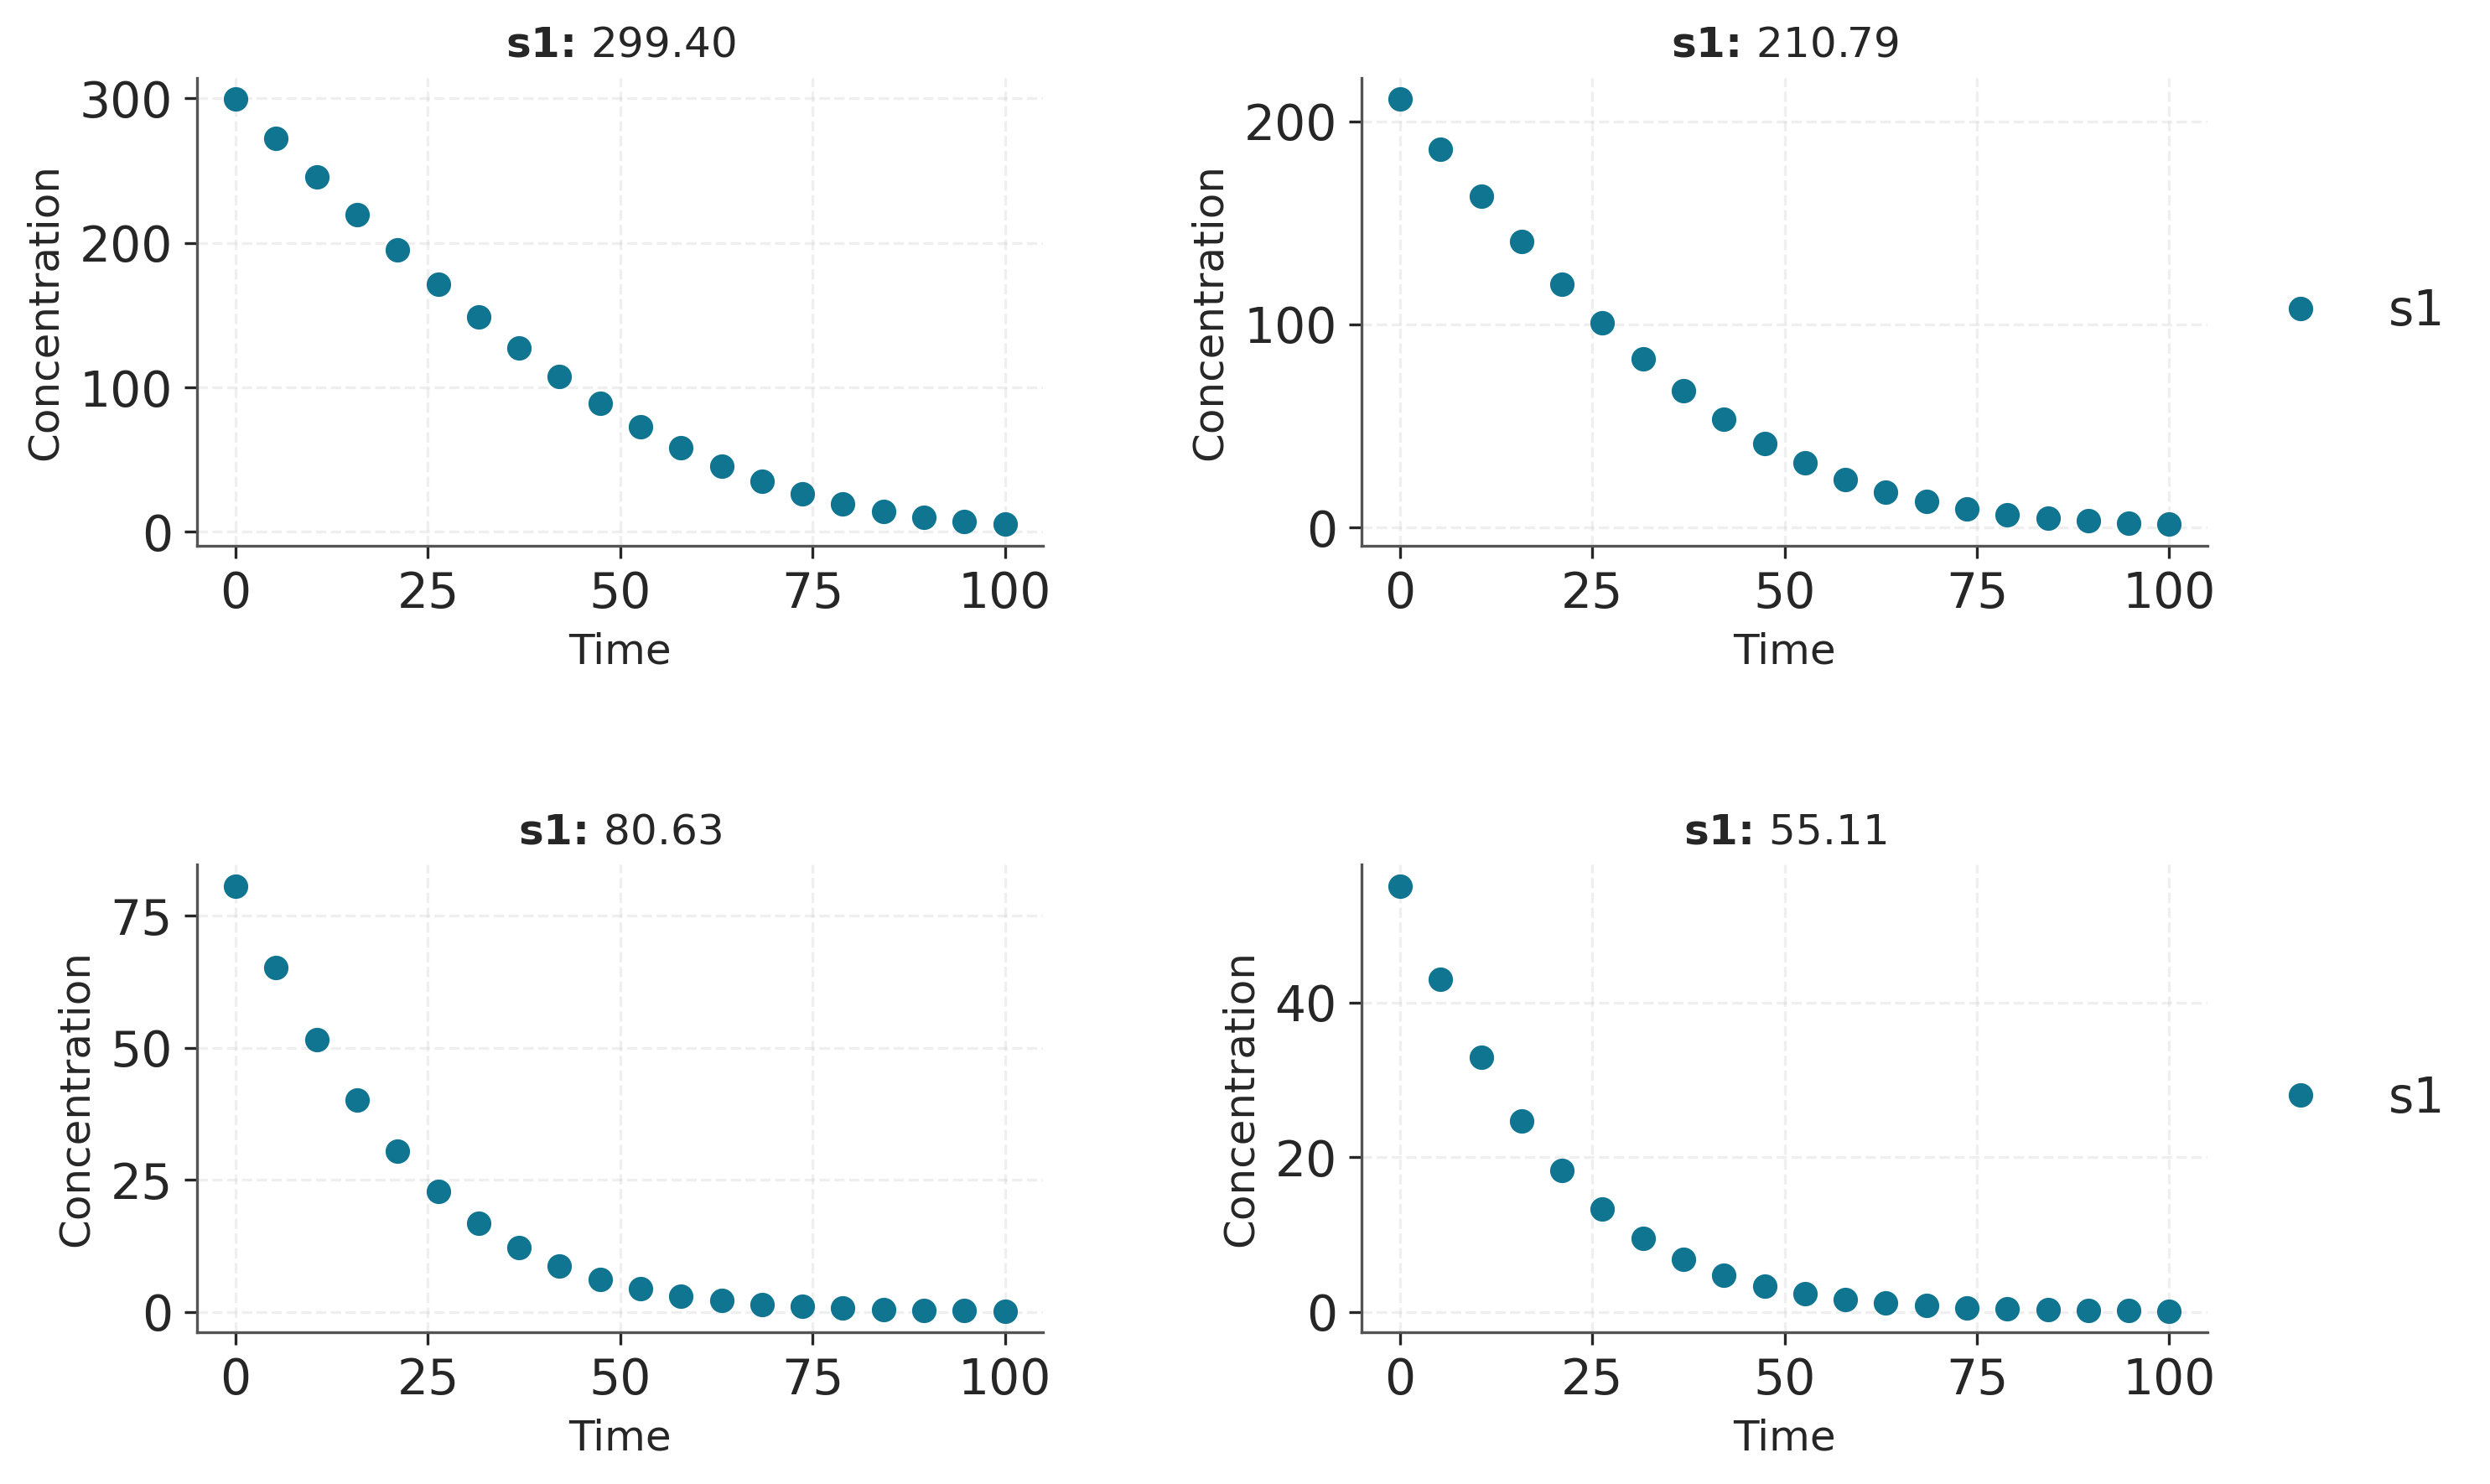

In [6]:
# Plot the first 4 simulations
f = dataset.plot(
    measurement_ids=[
        dataset.measurements[0].id,
        dataset.measurements[1].id,
        dataset.measurements[2].id,
        dataset.measurements[3].id
    ]
)

In [7]:
# Save the dataset
dataset.to_croissant("dataset", name="dataset", cite_as="cite me!")

🥐 Dataset exported to Croissant archive at dataset/dataset.zip